# Kriptonite

### Draft Kripton analysis

In [1]:
import time

In [2]:
from __future__ import print_function

In [3]:
%matplotlib inline

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import tables as tb
import numpy as np

In [7]:
import tables
import Core.mplFunctions as mpl
import Core.wfmFunctions as wfm

In [8]:
from Database import loadDB

In [30]:
import ICython.Sierpe.BLR as blr
import ICython.Core.peakFunctions as pf
import Core.peakFunctions as cpf
from ICython.Core.system_of_units import SystemOfUnits 

In [31]:
from scipy import signal

In [32]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [33]:
print(time.strftime("%d/%m/%Y"))
print(time.strftime("%H:%M:%S"))

08/12/2016
18:47:34


### Test BLR

#### test cython BLR code

In [14]:
path='/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC/run2976/'
ffile = 'run_2976.gdc1next.000.next1el_2976.root.h5'
r2976 = tables.open_file(path+ffile,'r+')
pmtrwf = r2976.root.RD.pmtrwf

In [15]:
DataPMT = loadDB.DataPMT(2976)
units = SystemOfUnits()
adc_to_pes = abs(DataPMT.adc_to_pes.values).astype(np.double)
coeff_c = abs(DataPMT.coeff_c.values).astype(np.double)
coeff_blr = abs(DataPMT.coeff_blr.values).astype(np.double)

In [16]:
event = 0
CWF = blr.deconv_pmt(pmtrwf[event], coeff_c, coeff_blr)

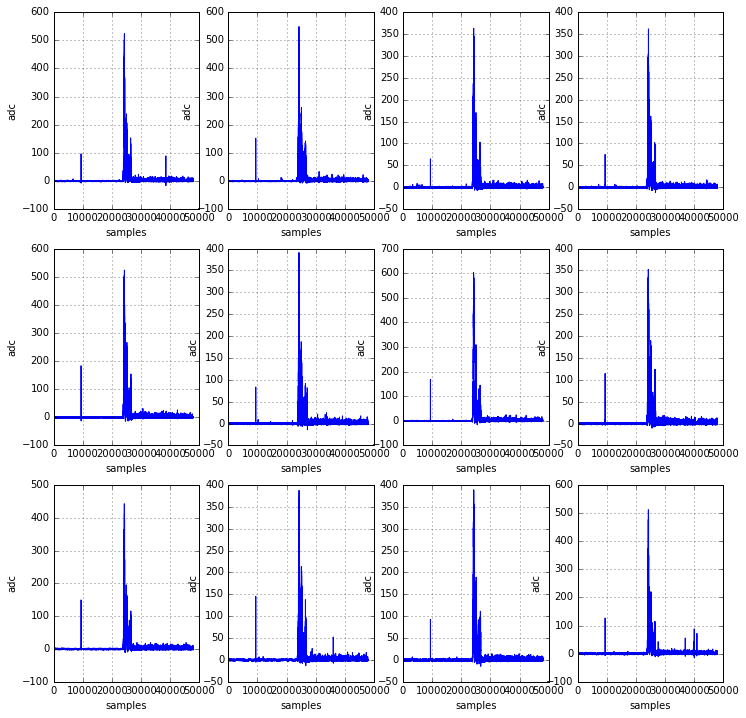

In [17]:
mpl.plot_waveforms(CWF)

### Test calibrated PMT sum, ZS and S12 functions

#### calibrated pmt sum

In [18]:
csum = pf.calibrated_pmt_sum(CWF, adc_to_pes, n_MAU=200, thr_MAU=5) 

In [19]:
wfm_length=48000 
tstep = 25
signal_t = np.arange(0., wfm_length * tstep, tstep)

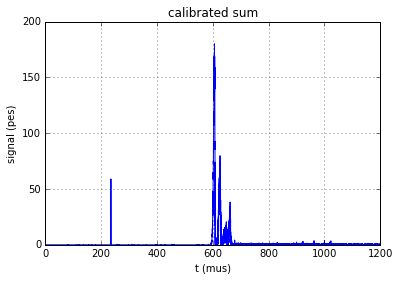

In [20]:
mpl.plot_signal(signal_t/units.mus, csum, title="calibrated sum",
                signal_start=0, signal_end=1200, 
                ymax = 200, 
                t_units='mus', units="pes")

#### ZS

In [22]:
wfzs_ene, wfzs_indx = pf.wfzs(csum, threshold=1*units.pes)

In [24]:
wfzs_t = pf.time_from_index(wfzs_indx)

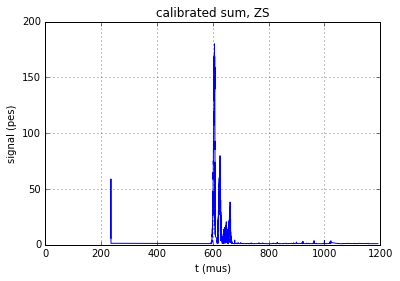

In [25]:
mpl.plot_signal(wfzs_t/units.mus, wfzs_ene, title="calibrated sum, ZS",
                signal_start=0, signal_end=1200, 
                ymax = 200, 
                t_units='mus', units="pes")

#### Find S12

In [27]:
S1 = pf.find_S12(wfzs_ene, wfzs_indx, tmin=0,  tmax=590*units.mus, stride=4)

In [34]:
s1df = cpf.s12_df(S1, lmin=8, lmax=20)

In [35]:
len(s1df)

1

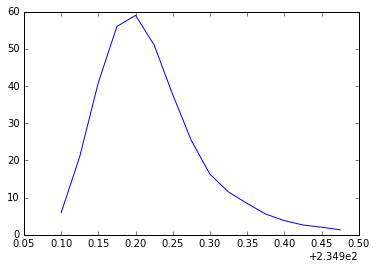

In [36]:
plt.plot(s1df[0].time_ns/units.mus, s1df[0].ene_pes)

In [37]:
S2 = pf.find_S12(wfzs_ene, wfzs_indx, tmin=590*units.mus,  tmax=1200*units.mus, stride=80)

In [38]:
s2df = cpf.s12_df(S2, lmin=100, lmax=20000000)

In [39]:
len(s2df)

3

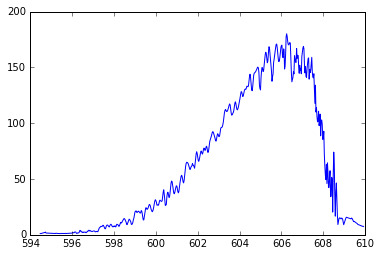

In [40]:
plt.plot(s2df[0].time_ns/units.mus, s2df[0].ene_pes)

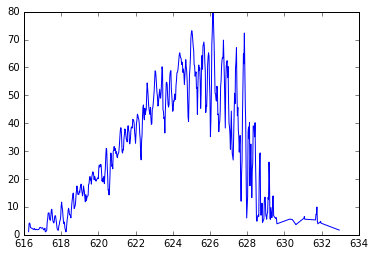

In [41]:
plt.plot(s2df[1].time_ns/units.mus, s2df[1].ene_pes)

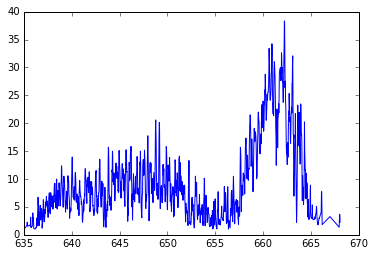

In [42]:
plt.plot(s2df[2].time_ns/units.mus, s2df[2].ene_pes)

number of peaks = 1
S12 number = 0, samples = 16 sum in pes =348.554582675


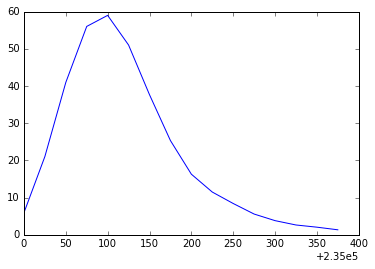

hit return


In [43]:
cpf.scan_S12(s1df)

In [44]:
r2976.close()

### Driver class

### Test driver

### Run 2976

In [22]:
ls /Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC/run2976

run_2976.gdc1next.000.next1el_2976.root.h5
run_2976.gdc1next.001.next1el_2976.root.h5
run_2976.gdc1next.002.next1el_2976.root.h5
run_2976.gdc1next.003.next1el_2976.root.h5
run_2976.gdc1next.004.next1el_2976.root.h5
run_2976.gdc1next.005.next1el_2976.root.h5


In [138]:
input_files =['run_2976.gdc1next.000.next1el_2976.root.h5',
              'run_2976.gdc1next.001.next1el_2976.root.h5',
              'run_2976.gdc1next.002.next1el_2976.root.h5',
              'run_2976.gdc1next.003.next1el_2976.root.h5',
              'run_2976.gdc1next.004.next1el_2976.root.h5',
              'run_2976.gdc1next.005.next1el_2976.root.h5']

In [76]:
input_files = ['run_2976.gdc2next.000.next1el_2976.root.h5',
'run_2976.gdc2next.001.next1el_2976.root.h5',
'run_2976.gdc2next.002.next1el_2976.root.h5',
'run_2976.gdc2next.003.next1el_2976.root.h5',
'run_2976.gdc2next.004.next1el_2976.root.h5',
'run_2976.gdc2next.005.next1el_2976.root.h5',
'run_2976.gdc2next.006.next1el_2976.root.h5',
'run_2976.gdc2next.007.next1el_2976.root.h5',
'run_2976.gdc2next.008.next1el_2976.root.h5',
'run_2976.gdc2next.009.next1el_2976.root.h5',
'run_2976.gdc2next.010.next1el_2976.root.h5',
'run_2976.gdc2next.011.next1el_2976.root.h5',
'run_2976.gdc2next.012.next1el_2976.root.h5',
'run_2976.gdc2next.013.next1el_2976.root.h5',
'run_2976.gdc2next.014.next1el_2976.root.h5',
'run_2976.gdc2next.015.next1el_2976.root.h5',
'run_2976.gdc2next.016.next1el_2976.root.h5',
'run_2976.gdc2next.017.next1el_2976.root.h5',
'run_2976.gdc2next.018.next1el_2976.root.h5',
'run_2976.gdc2next.019.next1el_2976.root.h5',
'run_2976.gdc2next.020.next1el_2976.root.h5',
'run_2976.gdc2next.021.next1el_2976.root.h5',
'run_2976.gdc2next.022.next1el_2976.root.h5',
'run_2976.gdc2next.023.next1el_2976.root.h5',
'run_2976.gdc2next.024.next1el_2976.root.h5',
'run_2976.gdc2next.025.next1el_2976.root.h5',
'run_2976.gdc2next.026.next1el_2976.root.h5',
'run_2976.gdc2next.027.next1el_2976.root.h5',
'run_2976.gdc2next.028.next1el_2976.root.h5',
'run_2976.gdc2next.029.next1el_2976.root.h5',
'run_2976.gdc2next.030.next1el_2976.root.h5',
'run_2976.gdc2next.031.next1el_2976.root.h5',
'run_2976.gdc2next.032.next1el_2976.root.h5',
'run_2976.gdc2next.033.next1el_2976.root.h5',
'run_2976.gdc2next.034.next1el_2976.root.h5',
'run_2976.gdc2next.035.next1el_2976.root.h5',
'run_2976.gdc2next.036.next1el_2976.root.h5',
'run_2976.gdc2next.037.next1el_2976.root.h5',
'run_2976.gdc2next.038.next1el_2976.root.h5',
'run_2976.gdc2next.039.next1el_2976.root.h5',
'run_2976.gdc2next.040.next1el_2976.root.h5',
'run_2976.gdc2next.041.next1el_2976.root.h5',
'run_2976.gdc2next.042.next1el_2976.root.h5',
'run_2976.gdc2next.043.next1el_2976.root.h5',
'run_2976.gdc2next.044.next1el_2976.root.h5',
'run_2976.gdc2next.045.next1el_2976.root.h5',
'run_2976.gdc2next.046.next1el_2976.root.h5',
'run_2976.gdc2next.047.next1el_2976.root.h5',
'run_2976.gdc2next.048.next1el_2976.root.h5',
'run_2976.gdc2next.049.next1el_2976.root.h5',
'run_2976.gdc2next.050.next1el_2976.root.h5',
'run_2976.gdc2next.051.next1el_2976.root.h5',
'run_2976.gdc2next.052.next1el_2976.root.h5',
'run_2976.gdc2next.053.next1el_2976.root.h5',
'run_2976.gdc2next.054.next1el_2976.root.h5',
'run_2976.gdc2next.055.next1el_2976.root.h5',
'run_2976.gdc2next.056.next1el_2976.root.h5',
'run_2976.gdc2next.057.next1el_2976.root.h5',
'run_2976.gdc2next.058.next1el_2976.root.h5',
'run_2976.gdc2next.059.next1el_2976.root.h5',
'run_2976.gdc2next.060.next1el_2976.root.h5',
'run_2976.gdc2next.061.next1el_2976.root.h5',
'run_2976.gdc2next.062.next1el_2976.root.h5',
'run_2976.gdc2next.063.next1el_2976.root.h5',
'run_2976.gdc2next.064.next1el_2976.root.h5',
'run_2976.gdc2next.065.next1el_2976.root.h5',
'run_2976.gdc2next.066.next1el_2976.root.h5']

In [54]:
input_files =['run_2976.gdc1next.000.next1el_2976.root.h5']

In [55]:
#input_files =['run_2976.gdc1next.000.next1el_2976.root.h5']
path='/Users/jjgomezcadenas/Documents/Development/NEXT/icdata/LSC/run2976/'

t0 = 1481230632.0 s
Opening run_2976.gdc1next.000.next1el_2976.root.h5... 

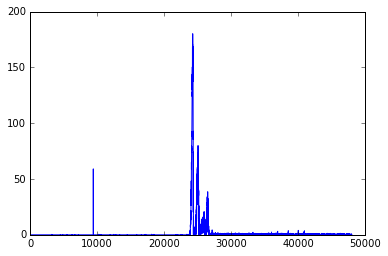

->
number of peaks = 1
S12 number = 0, samples = 16 sum in pes =349.241323023


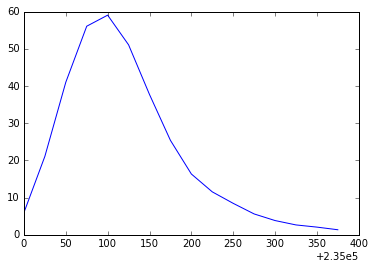

hit return
number of peaks = 3
S12 number = 0, samples = 551 sum in pes =37922.1382566


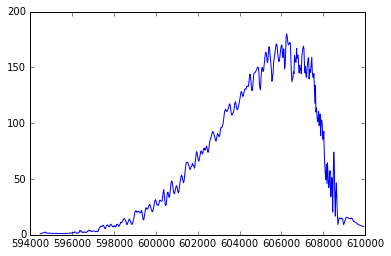

hit return
S12 number = 1, samples = 533 sum in pes =16984.0607176


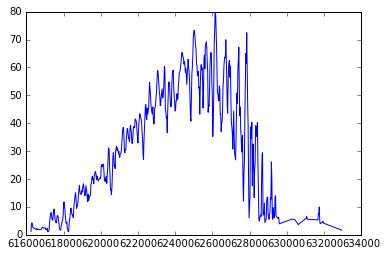

hit return
S12 number = 2, samples = 1174 sum in pes =11517.9098908


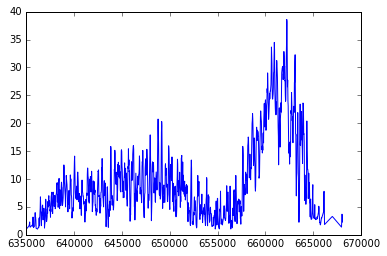

hit return
event in file = 0, total = 1


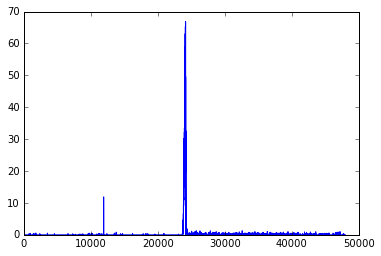

->
number of peaks = 1
S12 number = 0, samples = 8 sum in pes =51.4801736701


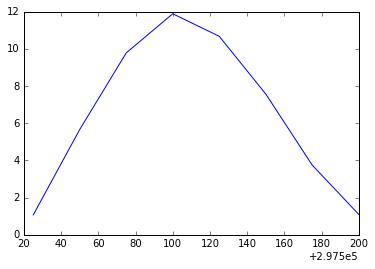

hit return
number of peaks = 1
S12 number = 0, samples = 475 sum in pes =12417.912519


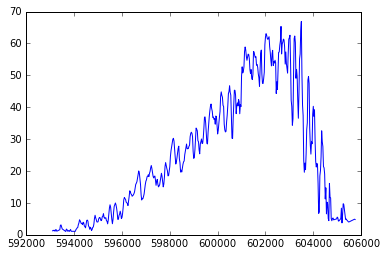

hit return
event in file = 1, total = 2


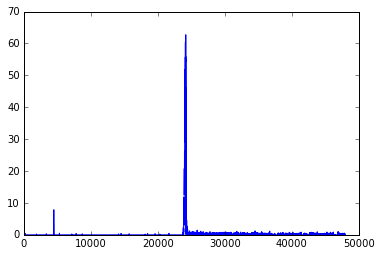

->
number of peaks = 1
S12 number = 0, samples = 13 sum in pes =44.9432823346


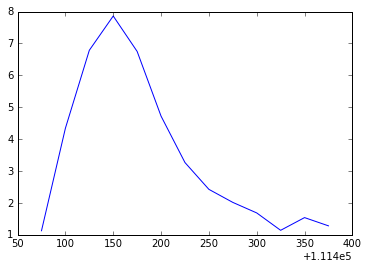

hit return
number of peaks = 1
S12 number = 0, samples = 431 sum in pes =11274.062152


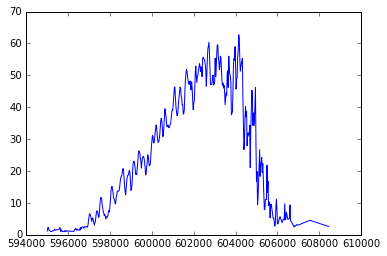

hit return
event in file = 2, total = 3


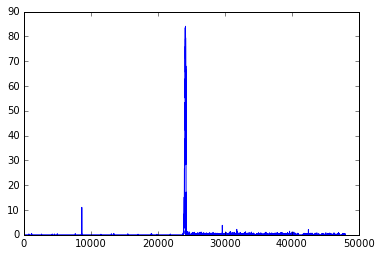

->
number of peaks = 1
S12 number = 0, samples = 10 sum in pes =57.5527606546


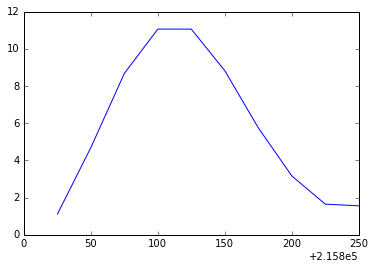

hit return
number of peaks = 1
S12 number = 0, samples = 407 sum in pes =13837.0839263


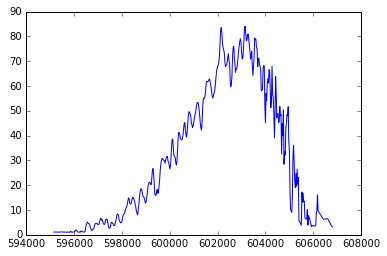

hit return
event in file = 3, total = 4
reached maximum number of events (=3)
Opening run_2976.gdc1next.001.next1el_2976.root.h5... event in file = 0, total = 5
reached maximum number of events (=3)
Opening run_2976.gdc1next.002.next1el_2976.root.h5... event in file = 0, total = 6
reached maximum number of events (=3)
Opening run_2976.gdc1next.003.next1el_2976.root.h5... event in file = 0, total = 7
reached maximum number of events (=3)
Opening run_2976.gdc1next.004.next1el_2976.root.h5... event in file = 0, total = 8
reached maximum number of events (=3)
Opening run_2976.gdc1next.005.next1el_2976.root.h5... event in file = 0, total = 9
reached maximum number of events (=3)
t1 = 1481230656.72 s
S12Finder has run over 10 events in 24.7269001007 seconds


In [75]:
s12f = cpf.S12Finder(run_number=2976, n_baseline=40000, n_MAU=200,
                 thr_trigger=5, wfm_length=48000)
s12f.set_files(path, input_files)  
s12f.set_s1(tmin=0*units.mus, tmax=590*units.mus, stride=4, lmin=8, lmax=20)
s12f.set_s2(tmin=590*units.mus, tmax=900*units.mus, stride=40, lmin=100, lmax=250000)
s12f.set_plot(plot_csum=True, plot_s1=True, plot_s2=True)
s12f.set_print(nprint=1)
s12f.find_s12(nmax=3, thr_s12=1.0*units.pes)

In [77]:
s12f = cpf.S12Finder(run_number=2976, n_baseline=40000, n_MAU=200,
                     thr_trigger=5, wfm_length=48000)
s12f.set_files(path, input_files)  
s12f.set_s1(tmin=0*units.mus, tmax=590*units.mus, stride=4, lmin=8, lmax=20)
s12f.set_s2(tmin=590*units.mus, tmax=900*units.mus, stride=40, lmin=100, lmax=250000)
s12f.set_plot(plot_csum=False, plot_s1=False, plot_s2=False)
s12f.set_print(nprint=10)
s12f.find_s12(nmax=2000000, thr_s12=1.0*units.pes)

t0 = 1481230713.06 s
Opening run_2976.gdc2next.000.next1el_2976.root.h5... event in file = 9, total = 10
event in file = 19, total = 20
event in file = 29, total = 30
event in file = 39, total = 40
event in file = 49, total = 50
event in file = 59, total = 60
event in file = 69, total = 70
event in file = 79, total = 80
event in file = 89, total = 90
Opening run_2976.gdc2next.001.next1el_2976.root.h5... event in file = 8, total = 100
event in file = 18, total = 110
event in file = 28, total = 120
event in file = 38, total = 130
event in file = 48, total = 140
event in file = 58, total = 150
event in file = 68, total = 160
event in file = 78, total = 170
event in file = 88, total = 180
Opening run_2976.gdc2next.002.next1el_2976.root.h5... event in file = 7, total = 190
event in file = 17, total = 200
event in file = 27, total = 210
event in file = 37, total = 220
event in file = 47, total = 230
event in file = 57, total = 240
event in file = 67, total = 250
event in file = 77, total = 2

In [78]:
1110./6036.

0.18389662027833

In [79]:
dS1 = s12f.get_dS1()
dS2 = s12f.get_dS2()

In [80]:
len(dS1.keys())

6035

In [81]:
len(dS2.keys())

6035

In [82]:
dS1[0][0].describe()

,time_ns,ene_pes
count,17.000000,17.000000
mean,274479.411765,10.098702
std,132.945975,10.292614
min,274275.000000,1.080829
25%,274375.000000,1.526385
50%,274475.000000,5.883077
75%,274575.000000,16.977754
max,274700.000000,29.352505


In [83]:
def rebin_waveform(swf, stride = 40):
    """
    rebins the a waveform according to stride
    The input waveform is a vector such that the index expresses time bin and the
    contents expresses energy (e.g, in pes)
    The function returns a DataFrame. The time bins and energy are rebinned according to stride
    """

    t = swf['time_ns'].values
    e = swf['ene_pes'].values
    n = len(swf)/int(stride)
    r = len(swf)%int(stride)

    lenb = n
    if r > 0:
        lenb = n+1

    T = np.zeros(lenb, dtype=np.double)
    E = np.zeros(lenb, dtype=np.double)
    
    j=0
    for i in range(n):
        E[i] = np.sum(e[j:j+stride])
        T[i] = np.mean(t[j:j+stride])
        j+= stride

    if r > 0:
        E[n] = np.sum(e[j:])
        T[n] = np.mean(t[j:])


    rbw={}
    rbw['ene_pes'] = E
    rbw['time_ns'] = T
    return pd.DataFrame(rbw)

In [92]:
evt = dS2.keys()
t0 = time()
nwf = 0
for i in evt:
    s2l = dS2[i]
    nwf +=len(s2l)
    for s2 in s2l:
        s2rb = rebin_waveform(s2, stride = 40)
t1 = time()        
dt = t1 - t0

print("rebinned {} wfm in {} s".format(nwf, dt))

rebinned 7169 wfm in 3.01973199844 s


In [93]:
3./7169.

0.00041846840563537454

In [87]:
dS2[0][0].describe()

,time_ns,ene_pes
count,387.000000,387.000000
mean,601514.664083,60.792493
std,2840.472967,48.590261
min,595675.000000,1.000572
25%,599112.500000,13.207976
50%,601525.000000,52.001699
75%,603937.500000,108.787565
max,606875.000000,145.221633


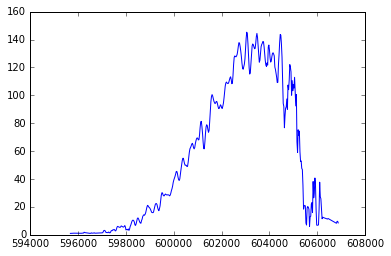

In [88]:
plt.plot(dS2[0][0].time_ns.values,dS2[0][0].ene_pes)

In [89]:
s2rb = rebin_waveform(dS2[0][0], stride = 40)

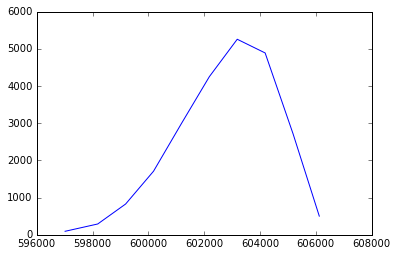

In [90]:
plt.plot(s2rb.time_ns.values,s2rb.ene_pes)

In [134]:
%%cython
cimport numpy as np
import numpy as np

def crebin_waveform(double [:] t, double[:] e, int stride = 40):
    """
    rebins the a waveform according to stride
    The input waveform is a vector such that the index expresses time bin and the
    contents expresses energy (e.g, in pes)
    The function returns a DataFrame. The time bins and energy are rebinned according to stride
    """

    assert(len(t) == len(e))
    
    cdef int n = len(t)/stride
    cdef int r = len(t)%stride
    
    lenb = n
    if r > 0:
        lenb = n+1
    
    cdef double [:] T = np.zeros(lenb, dtype=np.double)
    cdef double [:] E = np.zeros(lenb, dtype=np.double)
    
    cdef int j=0
    cdef int i, k
    cdef double esum, tmean
    for i in range(n):
        esum = 0
        tmean = 0
        for k in range(j, j + stride):
            esum += e[k]
            tmean += t[k]
            
        tmean /= float(stride)
        E[i] = esum
        T[i] = tmean
        j+= stride

    if r > 0:
        esum = 0
        tmean = 0
        for k in range(j, len(t)):
            esum += e[k]
            tmean += t[k]
        tmean /= float(len(t) - j)
        E[n] = esum
        T[n] = tmean
        

    return np.asarray(T), np.asarray(E)
    

In [135]:
evt = dS2.keys()
t0 = time()
nwf = 0
for i in evt:
    s2l = dS2[i]
    nwf +=len(s2l)
    for s2 in s2l:
        T,E = crebin_waveform(s2.time_ns.values, s2.ene_pes.values, stride = 40)
        s2rb = cpf.wfdf(T,E)
t1 = time()        
dt = t1 - t0

print("rebinned {} wfm in {} s".format(nwf, dt))

rebinned 7169 wfm in 2.27409601212 s


In [136]:
387./40.

9.675

In [137]:
9*40

360

In [138]:
s2 = dS2[0][0]
T,E = crebin_waveform(s2.time_ns.values, s2.ene_pes.values, stride = 40)
s2rb = cpf.wfdf(T,E)

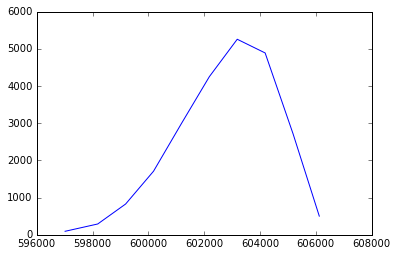

In [139]:
plt.plot(T,E)

In [112]:
def get_s12df(dS12):
    """
    Defines lists of S12 objects
    """
    
    evt = []  # event number
    n_s12 = []   # s12 number
    peak = [] # peak in pes
    width = [] # width in mus
    tpeak = [] # s12 time
    pes = []  # energy in pes
    peak_to_pes = []
    
    for key in dS12.keys():        
        S12L = dS12[key]
        n=0
        for s12df in S12L:
            n+=1
            evt.append(key)
            n_s12.append(n)
            peak.append(s12df.ene_pes.max())
            tpeak.append(s12df.time_ns.max())
            width.append(s12df.ene_pes.count())
            pes.append(np.sum(s12df.ene_pes.values))
            peak_to_pes.append(s12df.ene_pes.max()/np.sum(s12df.ene_pes.values))
            
    swf = {}
    swf['evt'] = evt
    swf['n_s12'] = n_s12 
    swf['peak'] = peak
    swf['width'] = width
    swf['tpeak'] = tpeak
    swf['pes'] = pes
    swf['peak_to_pes'] = peak_to_pes
    
    return pd.DataFrame(swf)
                
                
        

In [172]:
def s1s2_df(dS1, dS2):
    """
    Creates a PD dataframe with the information of S1 and S2
    """
    
    n_s1 = []   # s12 number
    peak_s1 = [] # peak in pes
    width_s1 = [] # width in mus
    tpeak_s1 = [] # s12 time
    pes_s1 = []  # energy in pes
    peak_to_pes_s1 = []
    
    n_s2 = []   # s12 number
    peak_s2 = [] # peak in pes
    width_s2 = [] # width in mus
    tpeak_s2 = [] # s12 time
    pes_s2 = []  # energy in pes
    peak_to_pes_s2 = []
    
    evts = dS1.keys()
    for evt in evts:        
        S1L = dS1[evt]
        S2L = dS2[evt]
        n_s1.append(len(S1L))
        peak = [] # peak in pes
        width = [] # width in mus
        tpeak = [] # s12 time
        pes = []  # energy in pes
        peak_to_pes = []
        for s1df in S1L:
            
            peak.append(s1df.ene_pes.max())
            tpeak.append(s1df.time_ns.max())
            width.append(s1df.ene_pes.count())
            pes.append(np.sum(s1df.ene_pes.values))
            peak_to_pes.append(s1df.ene_pes.max()/np.sum(s1df.ene_pes.values))
            
        peak_s1.append(peak)
        width_s1.append(width)
        tpeak_s1.append(tpeak)
        pes_s1.append(pes)
        peak_to_pes_s1.append(peak_to_pes)
        
        n_s2.append(len(S2L))
        peak = [] # peak in pes
        width = [] # width in mus
        tpeak = [] # s12 time
        pes = []  # energy in pes
        peak_to_pes = []
        
        for s2df in S2L:
            
            peak.append(s2df.ene_pes.max())
            tpeak.append(s2df.time_ns.max())
            width.append(s2df.ene_pes.count())
            pes.append(np.sum(s2df.ene_pes.values))
            peak_to_pes.append(s2df.ene_pes.max()/np.sum(s2df.ene_pes.values))
            
        peak_s2.append(peak)
        width_s2.append(width)
        tpeak_s2.append(tpeak)
        pes_s2.append(pes)
        peak_to_pes_s2.append(peak_to_pes)
            
    swf = {}
    swf['n_s1'] = n_s1 
    swf['peak_s1'] = peak_s1
    swf['width_s1'] = width_s1
    swf['tpeak_s1'] = tpeak_s1
    swf['pes_s1'] = pes_s1
    swf['peak_to_pes_s1'] = peak_to_pes_s1
    
    swf['n_s2'] = n_s2 
    swf['peak_s2'] = peak_s2
    swf['width_s2'] = width_s2
    swf['tpeak_s2'] = tpeak_s2
    swf['pes_s2'] = pes_s2
    swf['peak_to_pes_s2'] = peak_to_pes_s2
    
    return pd.DataFrame(swf)
                
                
        

In [173]:
s12df = s1s2_df(dS1, dS2)

In [174]:
s12df

,n_s1,n_s2,peak_s1,peak_s2,peak_to_pes_s1,peak_to_pes_s2,pes_s1,pes_s2,tpeak_s1,tpeak_s2,width_s1,width_s2
0,1,1,[29.3389360949],[145.205308681],[0.17324373899],[0.00278374442982],[169.350628576],[52161.8677079],[274750.0],[629150.0],[17],[1253]
1,1,1,[7.94937436823],[113.554181594],[0.16681652103],[0.00532557003387],[47.6533997899],[21322.4463995],[405550.0],[608675.0],[13],[450]
2,1,1,[6.4813964103],[56.5409694054],[0.180994970155],[0.00390555185074],[35.8098150724],[14477.0756006],[284125.0],[616450.0],[11],[765]
3,1,2,[6.98972217801],"[45.4465677511, 23.1268156712]",[0.176420546475],"[0.00487081603211, 0.00635718648924]",[39.6196606214],"[9330.38066958, 3637.901092]",[281075.0],"[607375.0, 621450.0]",[17],"[460, 380]"
4,1,1,[2.59174633397],[124.879611212],[0.181404918904],[0.0111643751308],[14.2870785954],[11185.5441751],[579900.0],[604175.0],[8],[205]
5,2,1,"[33.8148087, 2.10225070877]",[199.900363809],"[0.193665487774, 0.210546752496]",[0.00356761943241],"[174.604205885, 9.98472160624]",[56031.8631502],"[322175.0, 580300.0]",[616700.0],"[19, 8]",[740]
6,1,1,[25.0304287801],[85.3383461198],[0.168256749502],[0.00317251130008],[148.763296891],[26899.3040679],[122950.0],[613825.0],[13],[701]
7,1,2,[8.735806221],"[147.56588099, 30.444178331]",[0.167622079696],"[0.00683974274033, 0.00774076392293]",[52.1160830175],"[21574.7706591, 3932.96819721]",[481750.0],"[606875.0, 675900.0]",[13],"[379, 314]"
8,0,0,[],[],[],[],[],[],[],[],[],[]
9,0,1,[],[37.7919239792],[],[0.00532000998768],[],[7103.73177245],[],[606825.0],[],[421]


In [145]:
s1df = get_s12df(dS1)

In [146]:
s2df = get_s12df(dS2)

(array([  5.61900000e+03,   7.20000000e+01,   2.30000000e+01,
          1.20000000e+01,   3.00000000e+00,   3.00000000e+00,
          4.00000000e+00,   3.00000000e+00,   3.00000000e+00,
          4.00000000e+00]),
 array([  1. ,   4.3,   7.6,  10.9,  14.2,  17.5,  20.8,  24.1,  27.4,
         30.7,  34. ]),
 <a list of 10 Patch objects>)

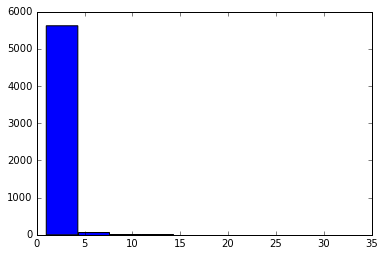

In [147]:
plt.hist(s1df.n_s12, bins=10)

(array([  5.43600000e+03,   0.00000000e+00,   1.04400000e+03,
          0.00000000e+00,   0.00000000e+00,   1.24000000e+02,
          0.00000000e+00,   7.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

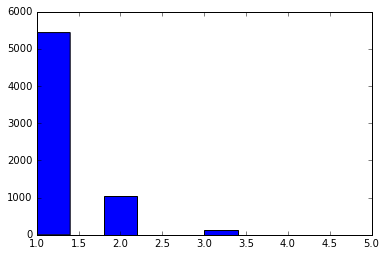

In [148]:
plt.hist(s2df.n_s12, bins=10)

(array([ 1342.,  1127.,  1249.,   777.,   398.,   220.,   158.,   103.,
           79.,    74.,    46.,    52.,    35.,    24.,    22.,    20.,
            8.,     5.,     4.,     3.]),
 array([   4.45227124,   24.32914339,   44.20601554,   64.08288769,
          83.95975984,  103.83663199,  123.71350414,  143.59037629,
         163.46724844,  183.34412059,  203.22099274,  223.09786489,
         242.97473704,  262.85160919,  282.72848134,  302.60535349,
         322.48222564,  342.35909778,  362.23596993,  382.11284208,
         401.98971423]),
 <a list of 20 Patch objects>)

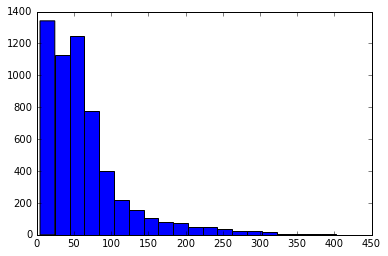

In [149]:
plt.hist(s1df.pes, bins=20)

(array([  3.54400000e+03,   2.05800000e+03,   4.89000000e+02,
          2.04000000e+02,   1.00000000e+02,   7.80000000e+01,
          4.90000000e+01,   3.40000000e+01,   1.40000000e+01,
          1.30000000e+01,   9.00000000e+00,   2.00000000e+00,
          9.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00]),
 array([  2.86974974e+02,   1.63526443e+04,   3.24183137e+04,
          4.84839830e+04,   6.45496523e+04,   8.06153217e+04,
          9.66809910e+04,   1.12746660e+05,   1.28812330e+05,
          1.44877999e+05,   1.60943668e+05,   1.77009338e+05,
          1.93075007e+05,   2.09140676e+05,   2.25206346e+05,
          2.41272015e+05,   2.57337684e+05,   2.73403354e+05,
          2.89469023e+05,   3.05534692e+05,   3.21600362e+05]),
 <a list of 20 Patch objects>)

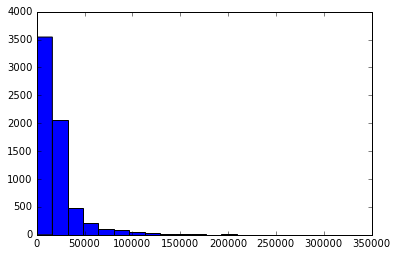

In [150]:
plt.hist(s2df.pes, bins=20)

(array([ 1350.,   831.,   788.,   723.,   586.,   501.,   335.,   231.,
          178.,   223.]),
 array([  8. ,   9.1,  10.2,  11.3,  12.4,  13.5,  14.6,  15.7,  16.8,
         17.9,  19. ]),
 <a list of 10 Patch objects>)

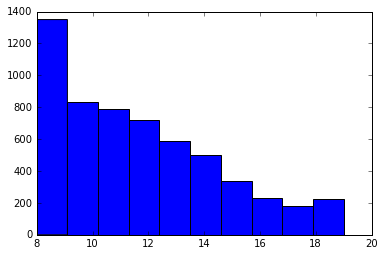

In [152]:
plt.hist(s1df.width.values, bins=10)

(array([  6.19000000e+03,   3.28000000e+02,   6.20000000e+01,
          2.50000000e+01,   3.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  100. ,  1030.5,  1961. ,  2891.5,  3822. ,  4752.5,  5683. ,
         6613.5,  7544. ,  8474.5,  9405. ]),
 <a list of 10 Patch objects>)

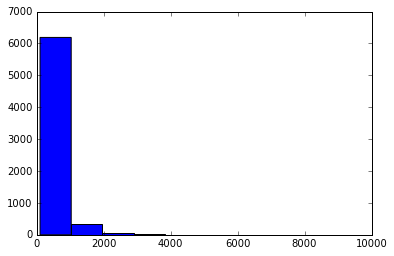

In [153]:
plt.hist(s2df.width.values)

(array([   36.,   114.,   150.,   203.,   368.,  1025.,  1969.,  1338.,
          477.,    66.]),
 array([ 0.06742749,  0.08439654,  0.10136558,  0.11833463,  0.13530367,
         0.15227272,  0.16924177,  0.18621081,  0.20317986,  0.2201489 ,
         0.23711795]),
 <a list of 10 Patch objects>)

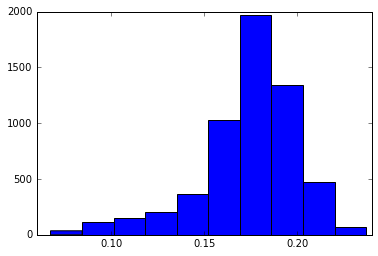

In [154]:
plt.hist(s1df.peak_to_pes)

(array([  2.57300000e+03,   2.98800000e+03,   7.17000000e+02,
          2.61000000e+02,   5.40000000e+01,   9.00000000e+00,
          5.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([ 0.00012665,  0.00449345,  0.00886025,  0.01322705,  0.01759385,
         0.02196065,  0.02632745,  0.03069425,  0.03506105,  0.03942785,
         0.04379465,  0.04816145,  0.05252825,  0.05689505,  0.06126185,
         0.06562865,  0.06999545,  0.07436225,  0.07872905,  0.08309585,
         0.08746266]),
 <a list of 20 Patch objects>)

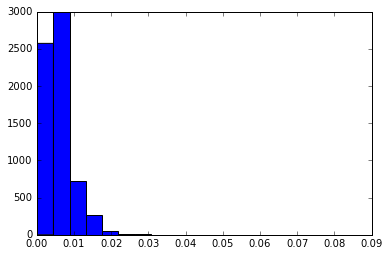

In [155]:
plt.hist(s2df.peak_to_pes, bins=20)

(array([  83.,  260.,  265.,  244.,  273.,  229.,  211.,  224.,  234.,
         260.,  211.,  274.,  252.,  241.,  268.,  282.,  268.,  343.,
         433.,  891.]),
 array([   1.15  ,   30.5925,   60.035 ,   89.4775,  118.92  ,  148.3625,
         177.805 ,  207.2475,  236.69  ,  266.1325,  295.575 ,  325.0175,
         354.46  ,  383.9025,  413.345 ,  442.7875,  472.23  ,  501.6725,
         531.115 ,  560.5575,  590.    ]),
 <a list of 20 Patch objects>)

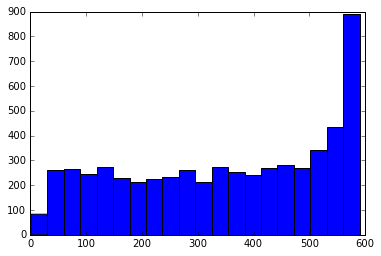

In [156]:
plt.hist(s1df.tpeak/units.mus, bins=20)

(array([ 2045.,  3255.,   524.,   252.,   113.,    96.,    47.,    49.,
           28.,    23.,    22.,    17.,    25.,    17.,    13.,    14.,
           12.,    12.,     9.,    39.]),
 array([ 592.75  ,  608.1125,  623.475 ,  638.8375,  654.2   ,  669.5625,
         684.925 ,  700.2875,  715.65  ,  731.0125,  746.375 ,  761.7375,
         777.1   ,  792.4625,  807.825 ,  823.1875,  838.55  ,  853.9125,
         869.275 ,  884.6375,  900.    ]),
 <a list of 20 Patch objects>)

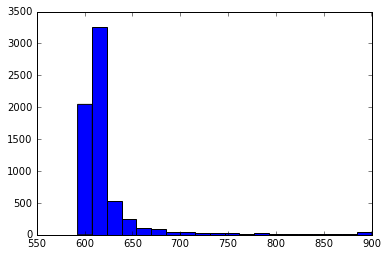

In [157]:
plt.hist(s2df.tpeak/units.mus, bins=20)

In [215]:
s12df.head()

,n_s1,n_s2,peak_s1,peak_s2,peak_to_pes_s1,peak_to_pes_s2,pes_s1,pes_s2,tpeak_s1,tpeak_s2,width_s1,width_s2
0,1,1,[29.3389360949],[145.205308681],[0.17324373899],[0.00278374442982],[169.350628576],[52161.8677079],[274750.0],[629150.0],[17],[1253]
1,1,1,[7.94937436823],[113.554181594],[0.16681652103],[0.00532557003387],[47.6533997899],[21322.4463995],[405550.0],[608675.0],[13],[450]
2,1,1,[6.4813964103],[56.5409694054],[0.180994970155],[0.00390555185074],[35.8098150724],[14477.0756006],[284125.0],[616450.0],[11],[765]
3,1,2,[6.98972217801],"[45.4465677511, 23.1268156712]",[0.176420546475],"[0.00487081603211, 0.00635718648924]",[39.6196606214],"[9330.38066958, 3637.901092]",[281075.0],"[607375.0, 621450.0]",[17],"[460, 380]"
4,1,1,[2.59174633397],[124.879611212],[0.181404918904],[0.0111643751308],[14.2870785954],[11185.5441751],[579900.0],[604175.0],[8],[205]


In [219]:
def select_ns12(s12df, n_s1=1, n_s2=1):
    s12df_ = s12df[(s12df.n_s1 == n_s1)]
    return s12df_[(s12df_.n_s2 == n_s2)]

In [240]:
def select_pes_s2(df, s2_pes_min=0, s2_pes_max=7000):
    df_ = df[df.pes_s2 > s2_pes_min]
    return df_[df_.pes_s2 < s2_pes_max]

In [220]:
def select_columns(df,column_list):
    return df.loc[:,column_list]

In [224]:
pes_s1s2_1  = select_columns(select_ns12(s12df, n_s1=1, n_s2=1),['pes_s1','pes_s2'])

In [226]:
pes_s1s2_1.head()

,pes_s1,pes_s2
0,[169.350628576],[52161.8677079]
1,[47.6533997899],[21322.4463995]
2,[35.8098150724],[14477.0756006]
4,[14.2870785954],[11185.5441751]
6,[148.763296891],[26899.3040679]


In [229]:
def get_array_from_dfc(dfc,indx=0):
    dfl = []
    for i in range(len(dfc.values)):
        dfl.append(dfc.values[i][indx])
    return np.array(dfl)



In [230]:
get_array_from_dfc(pes_s1s2_1.pes_s1,indx=0)

array([ 169.35062858,   47.65339979,   35.80981507, ...,   26.94600458,
         91.42801187,   75.71940298])

In [241]:
def data_frame_from_array(name_list, array_list):
    swf = {}
    assert(len(name_list) == len(array_list))
    
    for i, name in enumerate(name_list):
        swf[name] = array_list[i]
    return pd.DataFrame(swf)

In [242]:
pesDF = data_frame_from_array(['pes_s1','pes_s2'],
                              [get_array_from_dfc(pes_s1s2_1.pes_s1),get_array_from_dfc(pes_s1s2_1.pes_s2)])

In [243]:
pesDF.head()

,pes_s1,pes_s2
0,169.350629,52161.867708
1,47.653400,21322.446399
2,35.809815,14477.075601
3,14.287079,11185.544175
4,148.763297,26899.304068


In [244]:
krDF = select_pes_s2(pesDF, s2_pes_min=5000, s2_pes_max=7000)

In [246]:
krDF.head()

,pes_s1,pes_s2
7,10.344556,5683.908684
77,20.202620,5149.962887
94,9.641185,5900.621515
97,15.893162,6200.714249
117,13.016670,5206.257505


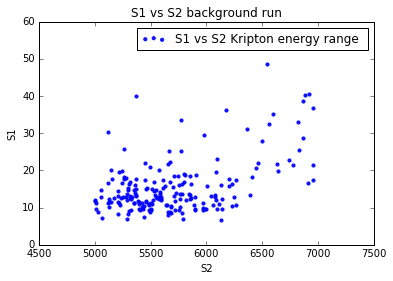

In [250]:
plt.scatter(krDF.pes_s2[krDF.pes_s1<50],krDF.pes_s1[krDF.pes_s1<50],
           # the marker as
            marker='o',
            # the color
            color='b',
            # the alpha
            alpha=0.9,
            # with size
            s = 10,
            # labelled this
            label='S1 vs S2 Kripton energy range ')
# Chart title
plt.title('S1 vs S2 background run')

# y label
plt.ylabel('S1')

# x label
plt.xlabel('S2')

# and a legend
plt.legend(loc='upper right')

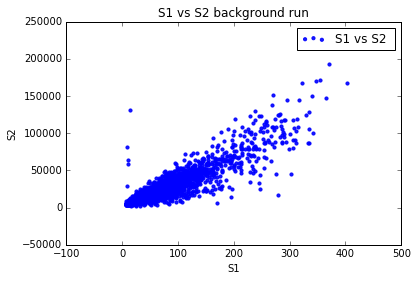

In [239]:
plt.scatter(get_array_from_dfc(pes_s1s2_1.pes_s1), get_array_from_dfc(pes_s1s2_1.pes_s2),
           # the marker as
            marker='o',
            # the color
            color='b',
            # the alpha
            alpha=0.9,
            # with size
            s = 10,
            # labelled this
            label='S1 vs S2 ')
# Chart title
plt.title('S1 vs S2 background run')

# y label
plt.ylabel('S2')

# x label
plt.xlabel('S1')

# and a legend
plt.legend(loc='upper right')